In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay , accuracy_score,confusion_matrix




2024-04-05 16:04:15.799883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape
#Each sample is a 28*28 matrix of RGB values

(28, 28)

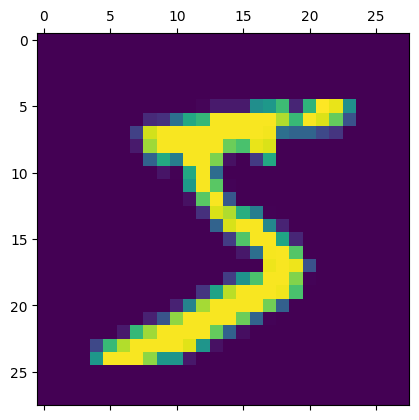

In [5]:
plt.matshow(X_train[0])

In [6]:
 y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
# normalizing the value
X_train=X_train/255
X_test=X_test/255


In [8]:
X_train.shape
# since it takes all feature as single column vector it needs to be flattened
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')    #dense as all neuron of the current layer connect with all neuron of the further layer
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

2024-04-05 15:45:26.232493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
 930/1875 [=============>................] - ETA: 2s - loss: 0.5931 - accuracy: 0.8491

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2677 - accuracy: 0.9249


[0.2676990330219269, 0.9248999953269958]

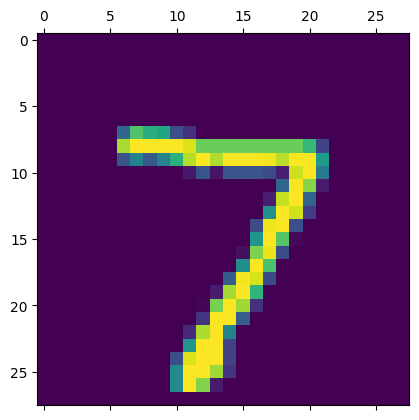

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predict=model.predict(X_test_flattened) 
np.argmax(y_predict[0]) #as the output is the scores for each class and we have to chosse the score of the max class

313/313 [==============================] - 1s 3ms/step


7

The accuracy of the cnn is: 0.9249
the classification report is as follows
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.89      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.91      0.95      0.93       982
           5       0.89      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



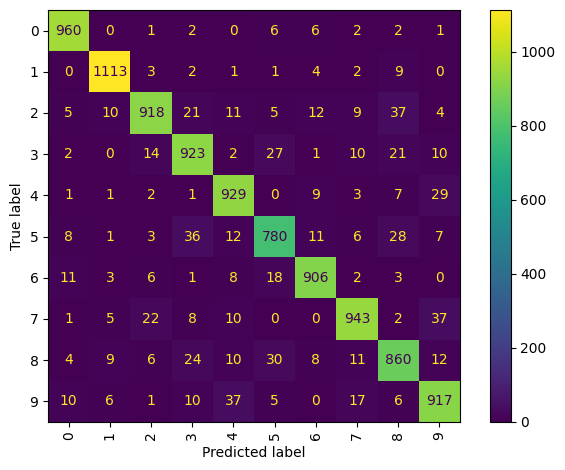

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_predict]
y_pred_labels[:5]
accuracy_rf = accuracy_score(y_test, y_pred_labels)
classification_rep_rf = classification_report(y_test, y_pred_labels)
print(f"The accuracy of the cnn is: {accuracy_rf}")
print("the classification report is as follows")
print(classification_rep_rf)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
disp=ConfusionMatrixDisplay(
    conf_matrix
)
disp.plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [ ]:
# adding one hidden layer
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2739 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1246 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9837


313/313 [==============================] - 1s 4ms/step
The accuracy of the cnn is: 0.9732
the classification report is as follows
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



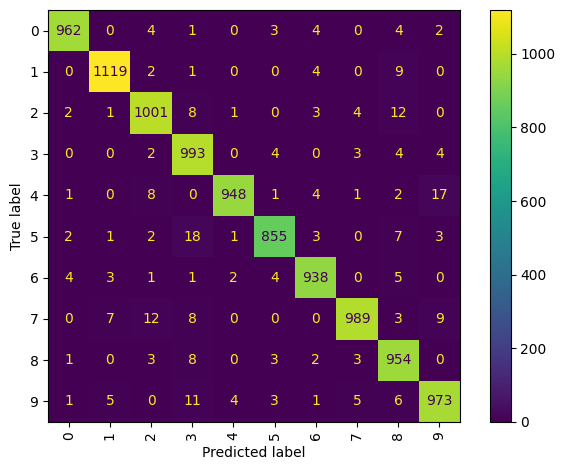

In [ ]:
y_predict=model.predict(X_test_flattened) 
y_pred_labels=[np.argmax(i) for i in y_predict]
y_pred_labels[:5]
accuracy_rf = accuracy_score(y_test, y_pred_labels)
classification_rep_rf = classification_report(y_test, y_pred_labels)
print(f"The accuracy of the cnn is: {accuracy_rf}")
print("the classification report is as follows")
print(classification_rep_rf)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
disp=ConfusionMatrixDisplay(
    conf_matrix
)
disp.plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [10]:
# instead of flattening the 2d array of features yu can use flatten array of keras library
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.2724 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.1248 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.0865 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.0531 - accuracy: 0.9831


In [ ]:
# # %load_ext tensorboard
# %reload_ext tensorboard
# %tensorboard --logdir logs/train

313/313 [==============================] - 0s 433us/step
The accuracy of the cnn is: 0.9744
the classification report is as follows
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



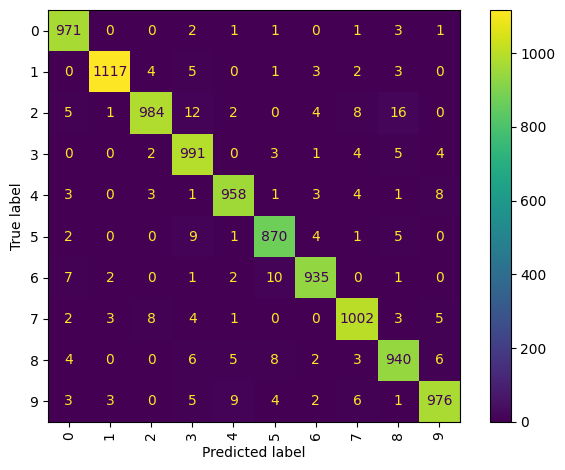

In [9]:
y_predict=model.predict(X_test) 
y_pred_labels=[np.argmax(i) for i in y_predict]
y_pred_labels[:5]
accuracy_rf = accuracy_score(y_test, y_pred_labels)
classification_rep_rf = classification_report(y_test, y_pred_labels)
print(f"The accuracy of the cnn is: {accuracy_rf}")
print("the classification report is as follows")
print(classification_rep_rf)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
disp=ConfusionMatrixDisplay(
    conf_matrix
)
disp.plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()